In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df_train = pd.read_csv('../src/t_train.csv', 
                       encoding='utf-8')
df_test  = pd.read_csv('../src/t_test.csv' , 
                       encoding='utf-8')
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked cabin_encoding  isMr  \
0  34.5      0      0   330911   7.8292   NaN        Q              M  True   
1  47.0      1      0   363272   7.0000   NaN        S              M  True   
2  62.0      0      0   240276   9.6875   NaN        Q              M  True   
3  27.0      0      0   315154   8.6625   NaN        S              M  True   
4  22.0      1      1  3101298  12.2875   NaN        S              M  True   

   isMrs  isMiss  
0  False   False  
1   True   False  
2  False   False  
3  False   False  
4   True   False

In [5]:
numerical = ['Age', 'SibSp', 'Parch', 'Fare', 'isMr', 'isMrs', 'isMiss']
categorical = ['Pclass', 'Sex', 'Embarked', 'cabin_encoding']
target = ['Survived']

In [76]:
x, y = df_train[numerical+categorical], df_train[target]

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

x = pd.get_dummies(x, columns=categorical, drop_first=True)
colunas = x.columns

imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(x)
x = imr.transform(x)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)

In [106]:
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Select K Best
params = {'skb__k': range(2, x.shape[1] + 1), 
          'clf__n_estimators': [30, 50, 100, 300],
          'clf__max_depth': range(2, 7)}
    

classifier_1 = Pipeline([('skb', SelectKBest(chi2)),
                         ('clf', RandomForestClassifier())])

grid = GridSearchCV(classifier_1, 
                    params, 
                    scoring='roc_auc',
                    n_jobs=5,
                    cv=3,
                    verbose=10,
                    return_train_score=True)

grid.fit(x_train, y_train.values.ravel())

Fitting 3 folds for each of 380 candidates, totalling 1140 fits
[CV 1/3; 1/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=2..........
[CV 1/3; 1/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=2;, score=(train=0.840, test=0.812) total time=   0.0s
[CV 3/3; 2/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=3..........
[CV 3/3; 2/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=3;, score=(train=0.838, test=0.840) total time=   0.0s
[CV 3/3; 3/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=4..........
[CV 3/3; 3/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=4;, score=(train=0.839, test=0.840) total time=   0.0s
[CV 3/3; 4/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=5..........
[CV 3/3; 4/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=5;, score=(train=0.843, test=0.845) total time=   0.1s
[CV 1/3; 6/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=7..........
[CV 1/3; 6/380] END clf__max_depth=2, clf__

[CV 2/3; 2/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=3..........
[CV 2/3; 2/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=3;, score=(train=0.839, test=0.835) total time=   0.1s
[CV 3/3; 8/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=9..........
[CV 3/3; 8/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=9;, score=(train=0.854, test=0.851) total time=   0.1s
[CV 1/3; 11/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=12........
[CV 1/3; 11/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=12;, score=(train=0.858, test=0.822) total time=   0.1s
[CV 2/3; 11/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=12........
[CV 2/3; 11/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=12;, score=(train=0.859, test=0.859) total time=   0.1s
[CV 2/3; 16/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=17........
[CV 2/3; 16/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=17;, score=(train=0.868, test=0.862

[CV 3/3; 1/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=2..........
[CV 3/3; 1/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=2;, score=(train=0.761, test=0.733) total time=   0.1s
[CV 3/3; 5/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=6..........
[CV 3/3; 5/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=6;, score=(train=0.850, test=0.851) total time=   0.1s
[CV 3/3; 7/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=8..........
[CV 3/3; 7/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=8;, score=(train=0.853, test=0.852) total time=   0.1s
[CV 1/3; 10/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=11........
[CV 1/3; 10/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=11;, score=(train=0.866, test=0.844) total time=   0.1s
[CV 3/3; 13/380] START clf__max_depth=2, clf__n_estimators=30, skb__k=14........
[CV 3/3; 13/380] END clf__max_depth=2, clf__n_estimators=30, skb__k=14;, score=(train=0.852, test=0.866) 

[CV 1/3; 75/380] START clf__max_depth=2, clf__n_estimators=300, skb__k=19.......
[CV 1/3; 75/380] END clf__max_depth=2, clf__n_estimators=300, skb__k=19;, score=(train=0.877, test=0.849) total time=   0.5s
[CV 2/3; 75/380] START clf__max_depth=2, clf__n_estimators=300, skb__k=19.......
[CV 2/3; 75/380] END clf__max_depth=2, clf__n_estimators=300, skb__k=19;, score=(train=0.874, test=0.866) total time=   0.3s
[CV 3/3; 75/380] START clf__max_depth=2, clf__n_estimators=300, skb__k=19.......
[CV 3/3; 75/380] END clf__max_depth=2, clf__n_estimators=300, skb__k=19;, score=(train=0.865, test=0.871) total time=   0.3s
[CV 1/3; 76/380] START clf__max_depth=2, clf__n_estimators=300, skb__k=20.......
[CV 1/3; 76/380] END clf__max_depth=2, clf__n_estimators=300, skb__k=20;, score=(train=0.878, test=0.853) total time=   0.3s
[CV 3/3; 87/380] START clf__max_depth=3, clf__n_estimators=30, skb__k=12........
[CV 3/3; 87/380] END clf__max_depth=3, clf__n_estimators=30, skb__k=12;, score=(train=0.870, te

[CV 2/3; 92/380] END clf__max_depth=3, clf__n_estimators=30, skb__k=17;, score=(train=0.890, test=0.875) total time=   0.1s
[CV 3/3; 92/380] START clf__max_depth=3, clf__n_estimators=30, skb__k=17........
[CV 3/3; 92/380] END clf__max_depth=3, clf__n_estimators=30, skb__k=17;, score=(train=0.879, test=0.881) total time=   0.1s
[CV 2/3; 98/380] START clf__max_depth=3, clf__n_estimators=50, skb__k=4.........
[CV 2/3; 98/380] END clf__max_depth=3, clf__n_estimators=50, skb__k=4;, score=(train=0.862, test=0.833) total time=   0.1s
[CV 3/3; 98/380] START clf__max_depth=3, clf__n_estimators=50, skb__k=4.........
[CV 3/3; 98/380] END clf__max_depth=3, clf__n_estimators=50, skb__k=4;, score=(train=0.861, test=0.847) total time=   0.1s
[CV 1/3; 99/380] START clf__max_depth=3, clf__n_estimators=50, skb__k=5.........
[CV 1/3; 99/380] END clf__max_depth=3, clf__n_estimators=50, skb__k=5;, score=(train=0.872, test=0.841) total time=   0.1s
[CV 2/3; 99/380] START clf__max_depth=3, clf__n_estimators=

[CV 2/3; 67/380] END clf__max_depth=2, clf__n_estimators=300, skb__k=11;, score=(train=0.867, test=0.867) total time=   0.5s
[CV 3/3; 67/380] START clf__max_depth=2, clf__n_estimators=300, skb__k=11.......
[CV 3/3; 67/380] END clf__max_depth=2, clf__n_estimators=300, skb__k=11;, score=(train=0.861, test=0.856) total time=   0.4s
[CV 1/3; 68/380] START clf__max_depth=2, clf__n_estimators=300, skb__k=12.......
[CV 1/3; 68/380] END clf__max_depth=2, clf__n_estimators=300, skb__k=12;, score=(train=0.874, test=0.854) total time=   0.5s
[CV 3/3; 73/380] START clf__max_depth=2, clf__n_estimators=300, skb__k=17.......
[CV 3/3; 73/380] END clf__max_depth=2, clf__n_estimators=300, skb__k=17;, score=(train=0.867, test=0.867) total time=   0.5s
[CV 1/3; 74/380] START clf__max_depth=2, clf__n_estimators=300, skb__k=18.......
[CV 1/3; 74/380] END clf__max_depth=2, clf__n_estimators=300, skb__k=18;, score=(train=0.876, test=0.853) total time=   0.5s
[CV 2/3; 74/380] START clf__max_depth=2, clf__n_est

[CV 3/3; 179/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=9........
[CV 3/3; 179/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=9;, score=(train=0.887, test=0.865) total time=   0.1s
[CV 3/3; 182/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=12.......
[CV 3/3; 182/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=12;, score=(train=0.882, test=0.871) total time=   0.1s
[CV 1/3; 183/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=13.......
[CV 1/3; 183/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=13;, score=(train=0.908, test=0.864) total time=   0.1s
[CV 1/3; 186/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=16.......
[CV 1/3; 186/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=16;, score=(train=0.904, test=0.857) total time=   0.1s
[CV 2/3; 186/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=16.......
[CV 2/3; 186/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=16;, score=(train=0.905, te

[CV 2/3; 181/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=11.......
[CV 2/3; 181/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=11;, score=(train=0.911, test=0.863) total time=   0.1s
[CV 3/3; 181/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=11.......
[CV 3/3; 181/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=11;, score=(train=0.885, test=0.871) total time=   0.1s
[CV 3/3; 184/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=14.......
[CV 3/3; 184/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=14;, score=(train=0.891, test=0.881) total time=   0.1s
[CV 1/3; 185/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=15.......
[CV 1/3; 185/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=15;, score=(train=0.903, test=0.858) total time=   0.1s
[CV 2/3; 187/380] START clf__max_depth=4, clf__n_estimators=50, skb__k=17.......
[CV 2/3; 187/380] END clf__max_depth=4, clf__n_estimators=50, skb__k=17;, score=(train=0.909, t

[CV 2/3; 219/380] START clf__max_depth=4, clf__n_estimators=300, skb__k=11......
[CV 2/3; 219/380] END clf__max_depth=4, clf__n_estimators=300, skb__k=11;, score=(train=0.908, test=0.868) total time=   0.3s
[CV 3/3; 219/380] START clf__max_depth=4, clf__n_estimators=300, skb__k=11......
[CV 3/3; 219/380] END clf__max_depth=4, clf__n_estimators=300, skb__k=11;, score=(train=0.893, test=0.879) total time=   0.4s
[CV 3/3; 222/380] START clf__max_depth=4, clf__n_estimators=300, skb__k=14......
[CV 3/3; 222/380] END clf__max_depth=4, clf__n_estimators=300, skb__k=14;, score=(train=0.896, test=0.873) total time=   0.3s
[CV 1/3; 223/380] START clf__max_depth=4, clf__n_estimators=300, skb__k=15......
[CV 1/3; 223/380] END clf__max_depth=4, clf__n_estimators=300, skb__k=15;, score=(train=0.905, test=0.861) total time=   0.3s
[CV 1/3; 226/380] START clf__max_depth=4, clf__n_estimators=300, skb__k=18......
[CV 1/3; 226/380] END clf__max_depth=4, clf__n_estimators=300, skb__k=18;, score=(train=0.9

[CV 1/3; 247/380] END clf__max_depth=5, clf__n_estimators=30, skb__k=20;, score=(train=0.920, test=0.859) total time=   0.0s
[CV 3/3; 248/380] START clf__max_depth=5, clf__n_estimators=50, skb__k=2........
[CV 3/3; 248/380] END clf__max_depth=5, clf__n_estimators=50, skb__k=2;, score=(train=0.836, test=0.771) total time=   0.1s
[CV 1/3; 249/380] START clf__max_depth=5, clf__n_estimators=50, skb__k=3........
[CV 1/3; 249/380] END clf__max_depth=5, clf__n_estimators=50, skb__k=3;, score=(train=0.909, test=0.825) total time=   0.1s
[CV 1/3; 252/380] START clf__max_depth=5, clf__n_estimators=50, skb__k=6........
[CV 1/3; 252/380] END clf__max_depth=5, clf__n_estimators=50, skb__k=6;, score=(train=0.911, test=0.848) total time=   0.1s
[CV 2/3; 252/380] START clf__max_depth=5, clf__n_estimators=50, skb__k=6........
[CV 2/3; 252/380] END clf__max_depth=5, clf__n_estimators=50, skb__k=6;, score=(train=0.933, test=0.857) total time=   0.1s
[CV 2/3; 255/380] START clf__max_depth=5, clf__n_estima

[CV 3/3; 258/380] END clf__max_depth=5, clf__n_estimators=50, skb__k=12;, score=(train=0.905, test=0.873) total time=   0.1s
[CV 1/3; 259/380] START clf__max_depth=5, clf__n_estimators=50, skb__k=13.......
[CV 1/3; 259/380] END clf__max_depth=5, clf__n_estimators=50, skb__k=13;, score=(train=0.919, test=0.867) total time=   0.1s
[CV 3/3; 262/380] START clf__max_depth=5, clf__n_estimators=50, skb__k=16.......
[CV 3/3; 262/380] END clf__max_depth=5, clf__n_estimators=50, skb__k=16;, score=(train=0.923, test=0.878) total time=   0.1s
[CV 1/3; 263/380] START clf__max_depth=5, clf__n_estimators=50, skb__k=17.......
[CV 1/3; 263/380] END clf__max_depth=5, clf__n_estimators=50, skb__k=17;, score=(train=0.925, test=0.863) total time=   0.1s
[CV 2/3; 267/380] START clf__max_depth=5, clf__n_estimators=100, skb__k=2.......
[CV 2/3; 267/380] END clf__max_depth=5, clf__n_estimators=100, skb__k=2;, score=(train=0.919, test=0.831) total time=   0.2s
[CV 3/3; 267/380] START clf__max_depth=5, clf__n_es

[CV 1/3; 283/380] END clf__max_depth=5, clf__n_estimators=100, skb__k=18;, score=(train=0.921, test=0.866) total time=   0.1s
[CV 1/3; 286/380] START clf__max_depth=5, clf__n_estimators=300, skb__k=2.......
[CV 1/3; 286/380] END clf__max_depth=5, clf__n_estimators=300, skb__k=2;, score=(train=0.916, test=0.828) total time=   0.4s
[CV 2/3; 286/380] START clf__max_depth=5, clf__n_estimators=300, skb__k=2.......
[CV 2/3; 286/380] END clf__max_depth=5, clf__n_estimators=300, skb__k=2;, score=(train=0.919, test=0.825) total time=   0.3s
[CV 2/3; 289/380] START clf__max_depth=5, clf__n_estimators=300, skb__k=5.......
[CV 2/3; 289/380] END clf__max_depth=5, clf__n_estimators=300, skb__k=5;, score=(train=0.923, test=0.841) total time=   0.4s
[CV 3/3; 289/380] START clf__max_depth=5, clf__n_estimators=300, skb__k=5.......
[CV 3/3; 289/380] END clf__max_depth=5, clf__n_estimators=300, skb__k=5;, score=(train=0.912, test=0.860) total time=   0.4s
[CV 3/3; 292/380] START clf__max_depth=5, clf__n_e

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('skb',
                                        SelectKBest(score_func=<function chi2 at 0x7f1da1e14ca0>)),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=5,
             param_grid={'clf__max_depth': range(2, 7),
                         'clf__n_estimators': [30, 50, 100, 300],
                         'skb__k': range(2, 21)},
             return_train_score=True, scoring='roc_auc', verbose=10)

In [107]:
est = grid.best_estimator_
print(grid.best_params_)
prob = est.predict_proba(x_test)[:, 1]
print(roc_auc_score(y_test, prob))
prob = est.predict_proba(x_train)[:, 1]
print(roc_auc_score(y_train, prob))

{'clf__max_depth': 6, 'clf__n_estimators': 30, 'skb__k': 16}
0.8306982872200263
0.9268734302902868


Best Parameters
	 {'clf__max_depth': 4, 'clf__n_estimators': 300, 'skb__k': 8}


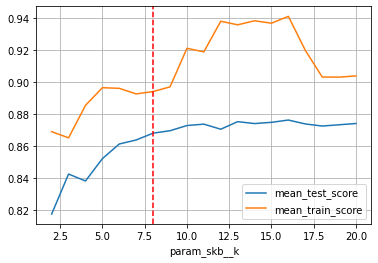

In [113]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by=['param_skb__k', 'rank_test_score'], ascending=True, inplace=True)
results.drop_duplicates(subset=['param_skb__k'], keep='first', inplace=True)

results_plot = results.loc[:, ['param_skb__k', 'mean_test_score', 'mean_train_score']]
results_plot.set_index('param_skb__k', inplace=True)
# Select best within margin
threshold = results_plot.mean_test_score.max() - 0.01
best_est = results_plot.loc[results_plot.mean_test_score >= threshold, :].index.min()

print("Best Parameters")
print("\t", results.loc[results.param_skb__k == best_est].params.values[0])


results_plot.plot()
plt.grid()
plt.axvline(best_est, color='red', ls='--')
plt.show()

In [117]:
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier

# Select K Best
params = {'sfm__max_features': range(2, x.shape[1] + 1), 
          'clf__n_estimators': range(1, 200),
          'clf__num_leaves': range(2, 90),
          'clf__learning_rate': [1e16, 1e-3, 1e-2, 0.05, 0.3]}
    

classifier_1 = Pipeline([('sfm', SelectFromModel(LGBMClassifier())),
                         ('clf', LGBMClassifier())])

grid = RandomizedSearchCV(classifier_1,
                          params,
                          n_iter=200,
                          scoring='roc_auc',
                          n_jobs=5,
                          cv=4,
                          verbose=1,
                          return_train_score=True)

grid.fit(x_train, y_train.values.ravel())

Fitting 4 folds for each of 200 candidates, totalling 800 fits


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('sfm',
                                              SelectFromModel(estimator=LGBMClassifier())),
                                             ('clf', LGBMClassifier())]),
                   n_iter=200, n_jobs=5,
                   param_distributions={'clf__learning_rate': [1e+16, 0.001,
                                                               0.01, 0.05,
                                                               0.3],
                                        'clf__n_estimators': range(1, 200),
                                        'clf__num_leaves': range(2, 90),
                                        'sfm__max_features': range(2, 21)},
                   return_train_score=True, scoring='roc_auc', verbose=1)

Best Parameters
	 {'sfm__max_features': 10, 'clf__num_leaves': 3, 'clf__n_estimators': 138, 'clf__learning_rate': 0.001}


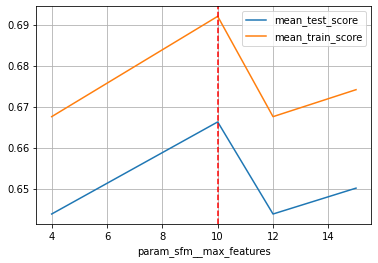

In [118]:
results = pd.DataFrame(grid.cv_results_)
results['diff'] = (results['mean_train_score'] - results['mean_test_score']) < 0.03
results = results[results['diff'] == True]
results.sort_values(by=['param_sfm__max_features', 'rank_test_score'], ascending=True, inplace=True)
results.drop_duplicates(subset=['param_sfm__max_features'], keep='first', inplace=True)

results_plot = results.loc[:, ['param_sfm__max_features', 'mean_test_score', 'mean_train_score']]
results_plot.set_index('param_sfm__max_features', inplace=True)
# Select best within margin
threshold = results_plot.mean_test_score.max() - 0.01
best_est = results_plot.loc[results_plot.mean_test_score >= threshold, :].index.min()

print("Best Parameters")
print("\t", results.loc[results.param_sfm__max_features == best_est].params.values[0])


results_plot.plot()
plt.grid()
plt.axvline(best_est, color='red', ls='--')
plt.show()

In [115]:
est = grid.best_estimator_
print("Melhor modelo")
print(grid.best_params_)
prob = est.predict_proba(x_test)[:, 1]
print("TEST  %4.2f" % (roc_auc_score(y_test, prob) * 100))
prob = est.predict_proba(x_train)[:, 1]
print("TRAIN %4.2f" % (roc_auc_score(y_train, prob) * 100))

Melhor modelo
{'sfm__max_features': 5, 'clf__num_leaves': 45, 'clf__n_estimators': 20, 'clf__learning_rate': 0.3}
TEST  59.64
TRAIN 92.15


In [116]:
simple_params = results.loc[results.param_sfm__max_features == best_est].params.values[0]

classifier_1.set_params(**simple_params)
classifier_1.fit(x_train, y_train)

features = colunas[classifier_1.named_steps['sfm'].get_support()]
print("Melhor modelo simples\n%s\n%s" % (simple_params, features.tolist()))
prob = classifier_1.predict_proba(x_test)[:, 1]
print("TEST  %4.2f" % (roc_auc_score(y_test, prob) * 100))
prob = classifier_1.predict_proba(x_train)[:, 1]
print("TRAIN %4.2f" % (roc_auc_score(y_train, prob) * 100))

Melhor modelo simples
{'sfm__max_features': 2, 'clf__num_leaves': 2, 'clf__n_estimators': 198, 'clf__learning_rate': 0.01}
['Age', 'Fare']
TEST  65.93
TRAIN 73.33


/home/mash/Documents/ML/Titanic/myenv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/mash/Documents/ML/Titanic/myenv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Index(['Age', 'Fare'], dtype='object')

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier

# Select K Best
params = {'sfm__max_features': range(2, x.shape[1] + 1), 
          'clf__n_estimators': range(1, 300),
          'clf__max_depth': range(1, 40)}
    

classifier_1 = Pipeline([('sfm', SelectFromModel(RandomForestClassifier())),
                         ('clf', RandomForestClassifier())])

grid = RandomizedSearchCV(classifier_1,
                          params,
                          n_iter=200,
                          scoring='roc_auc',
                          n_jobs=5,
                          cv=4,
                          verbose=1,
                          return_train_score=True)

grid.fit(x_train, y_train.values.ravel())

Fitting 4 folds for each of 200 candidates, totalling 800 fits


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('sfm',
                                              SelectFromModel(estimator=RandomForestClassifier())),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_iter=200, n_jobs=5,
                   param_distributions={'clf__max_depth': range(1, 40),
                                        'clf__n_estimators': range(1, 300),
                                        'sfm__max_features': range(2, 21)},
                   return_train_score=True, scoring='roc_auc', verbose=1)

Best Parameters
	 {'sfm__max_features': 3, 'clf__n_estimators': 165, 'clf__max_depth': 3}


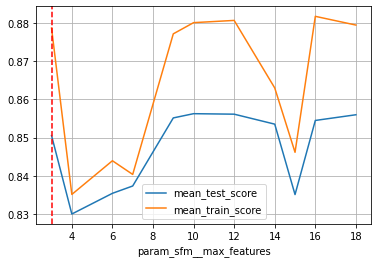

In [157]:
results = pd.DataFrame(grid.cv_results_)
results['diff'] = (results['mean_train_score'] - results['mean_test_score']) < 0.03
results = results[results['diff'] == True]
results.sort_values(by=['param_sfm__max_features', 'rank_test_score'], ascending=True, inplace=True)
results.drop_duplicates(subset=['param_sfm__max_features'], keep='first', inplace=True)

results_plot = results.loc[:, ['param_sfm__max_features', 'mean_test_score', 'mean_train_score']]
results_plot.set_index('param_sfm__max_features', inplace=True)
# Select best within margin
threshold = results_plot.mean_test_score.max() - 0.01
best_est = results_plot.loc[results_plot.mean_test_score >= threshold, :].index.min()

print("Best Parameters")
print("\t", results.loc[results.param_sfm__max_features == best_est].params.values[0])


results_plot.plot()
plt.grid()
plt.axvline(best_est, color='red', ls='--')
plt.show()

In [159]:
simple_params = results.loc[results.param_sfm__max_features == best_est].params.values[0]

classifier_1.set_params(**simple_params)
classifier_1.fit(x_train, y_train)
features = colunas[classifier_1.named_steps['sfm'].get_support()]

# Refazendo as features
x_train_refactored =  x_train[:, classifier_1.named_steps['sfm'].get_support()]
x_test_refactored  =  x_test[:, classifier_1.named_steps['sfm'].get_support()]

model = RandomForestClassifier(**classifier_1.named_steps['clf'].get_params())
model.fit(x_train_refactored, y_train)

print("Melhor modelo simples\n%s\n%s" % (simple_params, features.tolist()))
prob = model.predict_proba(x_test_refactored)[:, 1]
print("TEST  %4.2f" % (roc_auc_score(y_test, prob) * 100))
prob = model.predict_proba(x_train_refactored)[:, 1]
print("TRAIN %4.2f" % (roc_auc_score(y_train, prob) * 100))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Melhor modelo simples
{'sfm__max_features': 3, 'clf__n_estimators': 165, 'clf__max_depth': 3}
['Age', 'Fare', 'Sex_male']
TEST  80.48
TRAIN 87.55


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [160]:
import shap

explainer = shap.TreeExplainer(model)

x_test_1 = pd.DataFrame(x_test_refactored)
x_test_1.columns = features

shap_values = explainer.shap_values(x_test_1)

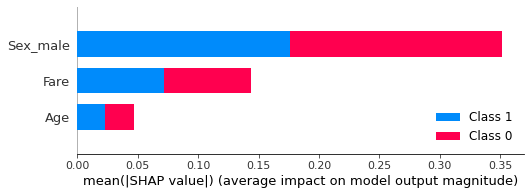

In [161]:
shap.summary_plot(shap_values, x_test_1)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


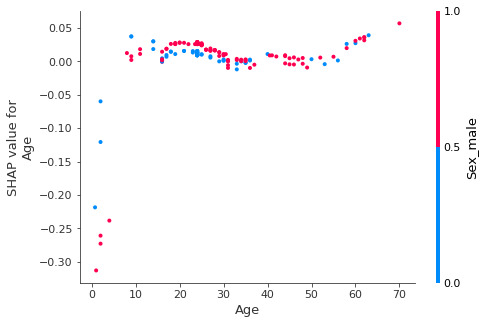

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


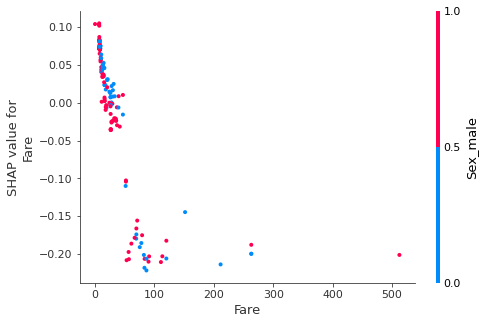

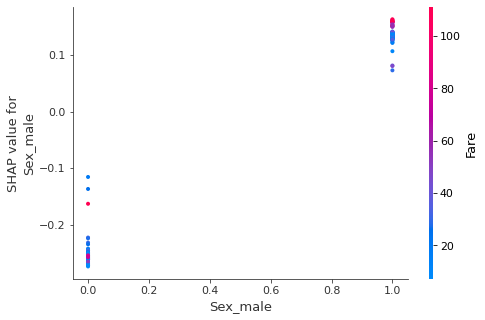

In [162]:
for name in x_test_1.columns:
    shap.dependence_plot(name, shap_values[0], x_test_1, display_features=x_test_1)